# Introduction

One of the main tenets of contemporary finance theory is mean-variance portfolio theory (MPT). Harry Markowitz, the creator, was granted the 1990 Nobel Prize in Economics based on this theoretical innovation. Despite being developed in the 1950s, this theory is still taught to finance students and used in real-world situations today. Our main goal with MPT is to use the principle of <i>diversification</i> to obtain the least portfolio risk possible given a certain return percentage or to obtain the maximum return possible using a certain risk percentage.

In this project, we have a client who is a technology enthusiast and he would like to invest in tech companies. The client does not want to invest more than 40% of his budget in any single stock. Normally, we would like to ask the client in what companies he would like to invest in. However, considering that our client is fictional, we are going to assume that he wants to invest in the biggest tech companies (Meta, Apple, Amazon, Netflix, and Google), colloquially known as the MAANG companies. Thus, our goal is to apply the principles of Portfolio Optimisation to determine which of the MAANG stocks our client should invest in.

## Structure

As per feedback from the lecturer, there is no EDA for this project. Accordingly, this notebook will be divided into the following sections:
<ul>
    <li><b>Importing the libraries:</b> We will import the data science stack and install a few additional libraries that we will need for this project.</li>
    <li><b>Stock data retrieval:</b> We will use <i>pandas_datareader</i> and <i>yfinance</i> to retrieve the stock data of the MAANG companies.</li>
    <li><b>The Expected Return and Volatility:</b> We will briefly explain the concept of the Expected Return in Portfolio Theory and apply it to our problem.</li>
    <li><b>The Optimal Portfolio:</b> Here, we will apply methods from the <i>scipy.optimize</i> module to optimize our portfolio.</li>
    <li><b>The Efficient Frontier:</b> The basic principle is that investors will only invest in a stock if it is on the efficient frontier. We will calculate and visualize the efficient frontier to determine which stocks our client should invest in.</li>
    <li><b>The Capital Market Line:</b> Finally, our portfolio should combine both risk and return in an optimal way. Therefore, we need to apply the concept of the Capital Market Line (CML) to achieve that.</li>
</ul>

# Importing the libraries

We will start by installing 2 important packages:
<ol>
    <li>pandas-datareader</li>
    <li>yfinance</li>
</ol>
We need both of these packages because we will get the stocks data of the MAANG companies from them.

In [1]:
# Use the pip command to install pandas_datareader and yfinance
!pip install pandas-datareader
!pip install yfinance

Next, we will import the following libraries from the python data science stack:
<ul>
    <li><i>numpy:</i> We will use <i>numpy</i> for all mathematical calculations.</li>
    <li><i>pandas:</i> To be able to interact with the stocks data by putting it into a dataframe.</li>
    <li><i>matplotlib.pyplot:</i> To effectively visualize all the operations we undertake on the dataset.</li>
</ul>

Additionally, we will make use of the packages we just installed and a a core python library:
<ul>
    <li><i>pandas_datareader.data:</i> This will be our main method to get the stocks data of the MAANG companies.</li>
    <li><i>yfinance:</i> We will only use it to call the <i>pdr_override</i> method to make the data retrieval faster.</li>
    <li><i>datetime:</i> We need it for all operations requiring date and time information.</li>
</ul>

We will import additional libraries should the need arise for them.

In [2]:
# Data manipulation libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)

# Pyplot will be used for data visualization
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
pd.plotting.register_matplotlib_converters()
%matplotlib inline

# Stock data libraries
import pandas_datareader.data as wb
import yfinance as yf

# datetime library for date and time operations
from datetime import datetime

# Call the pdr_override method to let yfinance handle the data retrieval so it becomes faster
yf.pdr_override()

# Stock data retrieval

We officially start by importing the stock data using the ticker symbol of each of the MAANG companies.

In [3]:
# Preliminary data to import the stock information
maang_tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
start = datetime(2018, 1, 1)
today = datetime.today().strftime('%Y-%m-%d')
noa = len(maang_tickers)

# We will import the Adjusted Closing Prices of the MAANG companies
df = wb.DataReader(maang_tickers, start=start, end=today)['Adj Close']
df.columns = maang_tickers

# Let's view the first few rows to make sure that everything is alright
df.head()

[*********************100%%**********************]  5 of 5 completed


,META,AAPL,AMZN,NFLX,GOOG
Date,,,,,
2018-01-02,40.722881,59.450500,53.250000,181.419998,201.070007
2018-01-03,40.715786,60.209999,54.124001,184.669998,205.050003
2018-01-04,40.904915,60.479500,54.320000,184.330002,205.630005
2018-01-05,41.370625,61.457001,55.111500,186.850006,209.990005
2018-01-08,41.216961,62.343498,55.347000,188.279999,212.050003


## Visualizing the prices and returns

Next, we visualize the data using Matplotlib. We will use two types of plots:
<ol>
    <li>A line plot to visualize the different stocks in a normalized manner.</li>
    <li>Histograms to visualize the logarithmic returns of the stocks.</li>
</ol>

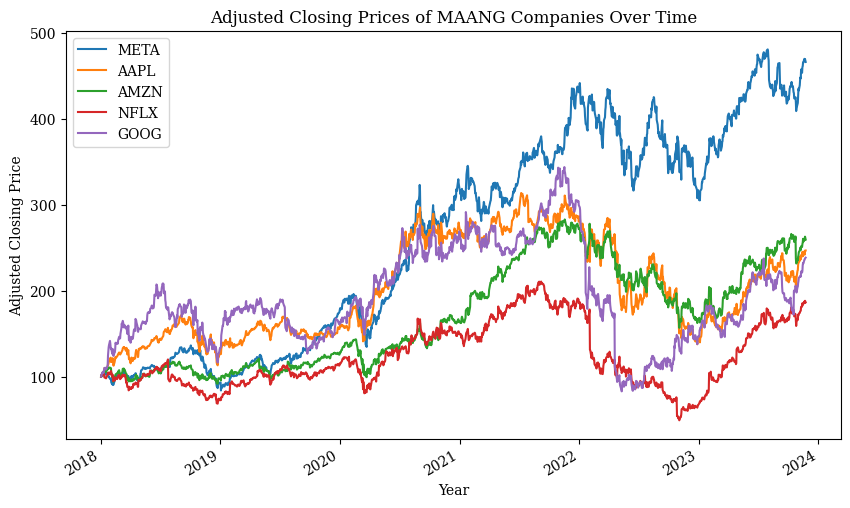

In [4]:
# Normalize the data and plot the line plot
(df / df.iloc[0] * 100).plot(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Adjusted Closing Price')
plt.title('Adjusted Closing Prices of MAANG Companies Over Time')
plt.show()

The line plot displays the trend of the adjusted closing prices of the different MAANG companies. Among all the stocks, we see that Meta experienced the greatest growth starting from the year 2020, which persists till today. All of the companies experienced during the 2020 COVID pandemic.

However, the most notable insight we can draw is the steep decline of Google's stock beginning from late 2022. A quick internet search tells that this coincided with the release of Bard, Google's chatbot, and Wall Street's dissatisfaction with Google's ad revenue and cloud business. However, Google seems to be recovering quite well from this setback.

Next, we draw the logarithmic returns of the MAANG companies in the form of histograms.

Text(0.5, 0.98, 'Logarithmic Returns of MAANG Stocks')

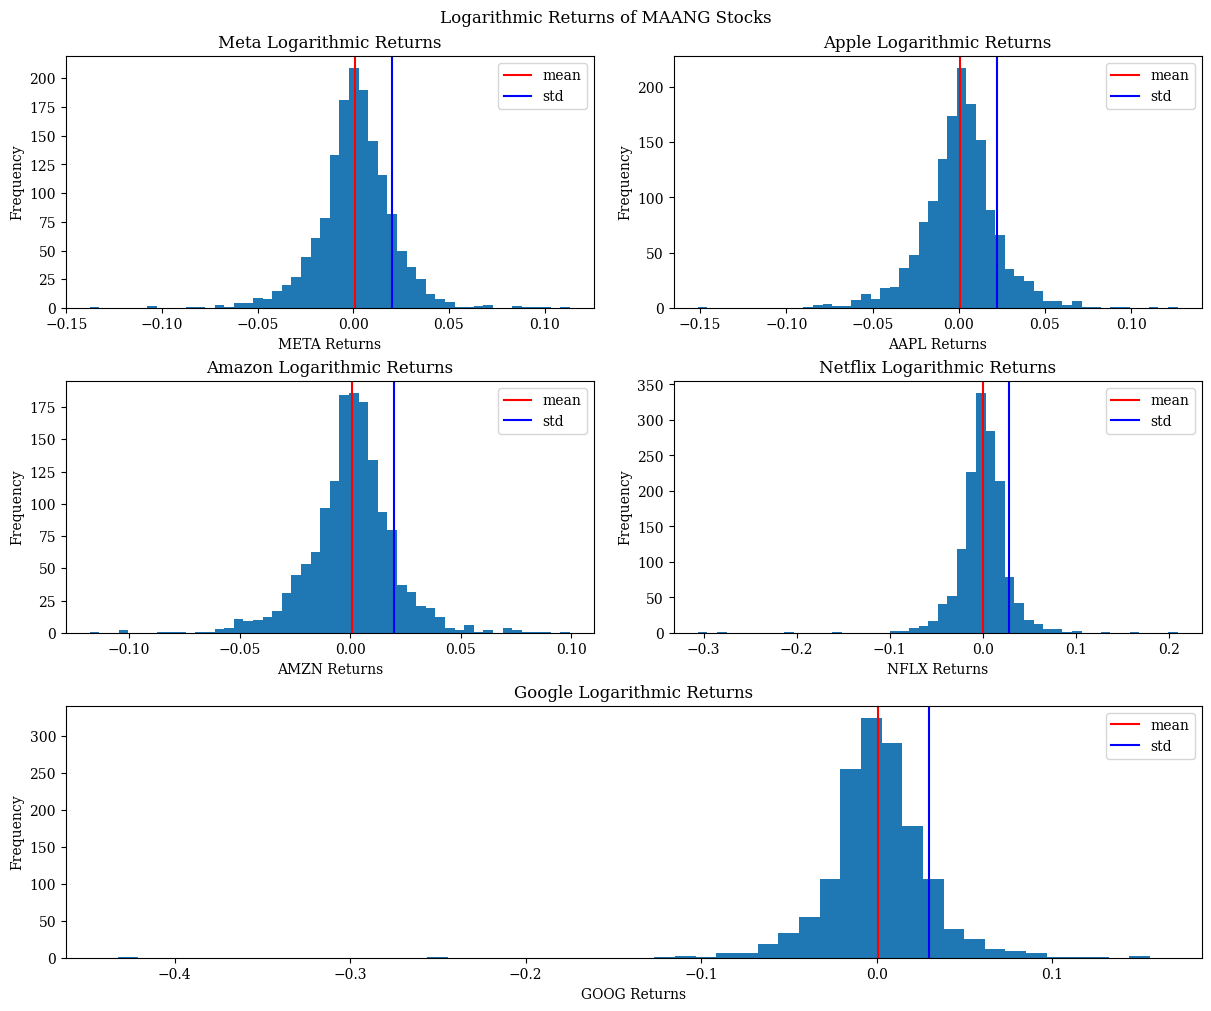

In [5]:
# Get the logarithmic returns of the stocks
rets = np.log(df / df.shift(1))

# Plot them using histograms
# We first define a figure and add a GridSpec to this figure
# It helps to arrange our plots
fig = plt.figure(figsize=(12, 10), layout='constrained')
spec = fig.add_gridspec(3, 2)

# Meta Logarithmic Returns
ax1 = fig.add_subplot(spec[0, 0])
ax1.hist(x=rets['META'], bins=50)
ax1.axvline(rets['META'].mean(), color='r', linewidth=1.5, label='mean')
ax1.axvline(rets['META'].std(), color='b', linewidth=1.5, label='std')
ax1.legend(loc=0)
ax1.title.set_text('Meta Logarithmic Returns')
ax1.set_xlabel('META Returns')
ax1.set_ylabel('Frequency')

# Apple Logarithmic Returns
ax2 = fig.add_subplot(spec[0, 1])
ax2.hist(x=rets['AAPL'], bins=50)
ax2.axvline(rets['AAPL'].mean(), color='r', linewidth=1.5, label='mean')
ax2.axvline(rets['AAPL'].std(), color='b', linewidth=1.5, label='std')
ax2.legend(loc=0)
ax2.title.set_text('Apple Logarithmic Returns')
ax2.set_xlabel('AAPL Returns')
ax2.set_ylabel('Frequency')

# Amazon Logarithmic Returns
ax3 = fig.add_subplot(spec[1, 0])
ax3.hist(x=rets['AMZN'], bins=50)
ax3.axvline(rets['AMZN'].mean(), color='r', linewidth=1.5, label='mean')
ax3.axvline(rets['AMZN'].std(), color='b', linewidth=1.5, label='std')
ax3.legend(loc=0)
ax3.title.set_text('Amazon Logarithmic Returns')
ax3.set_xlabel('AMZN Returns')
ax3.set_ylabel('Frequency')

# Netflix Logarithmic Returns
ax4 = fig.add_subplot(spec[1, 1])
ax4.hist(x=rets['NFLX'], bins=50)
ax4.axvline(rets['NFLX'].mean(), color='r', linewidth=1.5, label='mean')
ax4.axvline(rets['NFLX'].std(), color='b', linewidth=1.5, label='std')
ax4.legend(loc=0)
ax4.title.set_text('Netflix Logarithmic Returns')
ax4.set_xlabel('NFLX Returns')
ax4.set_ylabel('Frequency')

# Google Logarithmic Returns
ax5 = fig.add_subplot(spec[2, :])
ax5.hist(x=rets['GOOG'], bins=50)
ax5.axvline(rets['GOOG'].mean(), color='r', linewidth=1.5, label='mean')
ax5.axvline(rets['GOOG'].std(), color='b', linewidth=1.5, label='std')
ax5.legend(loc=0)
ax5.title.set_text('Google Logarithmic Returns')
ax5.set_xlabel('GOOG Returns')
ax5.set_ylabel('Frequency')

plt.suptitle("Logarithmic Returns of MAANG Stocks")

We see from the histograms that the logarithmic returns of the MAANG stocks are normally distributed. First, all of the histogram have the bell-shaped curve typical of a normal distribution. Second, the mean and standard deviation are close to each other in all cases, further proving our point.

## Getting the average returns, covariance and correlation matrices

The covariance matrix for the financial instruments to be invested in is the central piece of the portfolio selection process. We use the pandas <i>mean</i> and <i>cov</i> methods on the logarithmic returns and annualize the results to gain an understanding of the average returns over time, and how the returns of the MAANG stocks relate to each other. We annualize the results by multiplying them by 252, representing the number of trading days per year.

In [6]:
rets.mean() * 252

META    0.261522
AAPL    0.153428
AMZN    0.161974
NFLX    0.105777
GOOG    0.147603
dtype: float64

Predictably, Google (or Alphabet, if you will) has the highest mean returns.

In [7]:
rets.cov() * 252

,META,AAPL,AMZN,NFLX,GOOG
META,0.101802,0.071052,0.067964,0.079040,0.071154
AAPL,0.071052,0.126638,0.075706,0.093845,0.097253
AMZN,0.067964,0.075706,0.098333,0.090117,0.072616
NFLX,0.079040,0.093845,0.090117,0.191079,0.102171
GOOG,0.071154,0.097253,0.072616,0.102171,0.226732


We see that the covariance matrix shows nothing except positive values. This indicates that all the stocks have the tendency to co-move on the same direction. Therefore, we establish that there is a positive association between all the stocks.

Last but not least, let us check the correlation between the different returns by displaying a correlation matrix. It will help us to establish the strength and magnitude of the relations between the returns.

In [8]:
rets.corr()

,META,AAPL,AMZN,NFLX,GOOG
META,1.000000,0.625774,0.679286,0.566716,0.468344
AAPL,0.625774,1.000000,0.678419,0.603288,0.573939
AMZN,0.679286,0.678419,1.000000,0.657432,0.486328
NFLX,0.566716,0.603288,0.657432,1.000000,0.490867
GOOG,0.468344,0.573939,0.486328,0.490867,1.000000


From the correlation matrix, we deduce that the strongest relation among all the returns is the returns of Meta and Amazon.

In the next phase, we will examine the expected return of the portfolio.

# The Expected Return and Volatility

The client does not want to invest more than 40% of his budget in any single stock. We need to generate 5 random weights for each of the five stocks, and make sure that none of the weights surpass 40%.

In [203]:
# Let's turn this process into a function because we will use it later
def get_weights() -> np.ndarray:
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    while np.all(weights <= 0.4) != True:
        weights = np.random.random(noa)
        weights /= np.sum(weights)
    return weights

weights = get_weights()

print(f"The weights are: {weights.tolist()}")
print(f"The sum of the weights is: {weights.sum()}")
print(f"Are the weights all less than or equal 0.4?\nAnswer: {np.all(weights <= 0.4)}")

The weights are: [0.005056788107421561, 0.29597421907943894, 0.27264125617401613, 0.2941676699274061, 0.13216006671171734]
The sum of the weights is: 1.0
Are the weights all less than or equal 0.4?
Answer: True


Now that we have our weights and average returns, we are able to calculate the expected portfolio return. Given a number of financial instruments $I$, a number of weights $w_1, w_2, ... w_i$ where $\sum \limits _I w_i = 1$, and a number of average returns $\mu_1, \mu_2, ... \mu_i$, we calculate the expected return as:

$$
    E[R_p] = \sum \limits _I w_i \mu_i
$$

In [204]:
# We need to turn this into a function
def get_returns(weights) -> float:
    return np.sum(rets.mean() * weights) * 252

print(get_returns(weights=weights))

0.14151744785578022


Notice that we annualized the expected returns by multiplying the result with the number of trading days. 

Now that we calculated the expected return of the portfolio, the second thing we will concern ourselves with is the variance. By calculating the variance, we will then be able to calculate the standard deviation (i.e. the volatility) of the returns.

Given a number of financial instruments $I$, a number of weights $w_1, w_2, ... w_i$, a number of average returns $R_1, R_2, ... R_i$, and the expected portfolio return $R_p$, we calculate the variance as:

$$
    Var[R_p] = \sum \limits _I w_i * Cov(R_i, R_p)
$$

From there, we calculate the standard deviation of the portfolio as:

$$
    SD[R_p] = \sqrt{Var[R_p]}
$$

In [205]:
# Again, we will turn this into a function
# We use weights.T to get the transpose of the weights matrix
def get_volatility(weights) -> float:
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

print(get_volatility(weights=weights))

0.32160751800776927


Why are interested in calculating the expected return and the volatility of the average returns? There are three reasons:

<ol>
    <li>It gives an idea of the relationship between the risk and return.</li>
    <li>It allows to calculate and visualize the Sharpe Ratio, which is the ratio of the excess return to the excess risk.</li>
    <li>Most importantly, we can a generate a range of risk and return profiles for a set of financial instruments (in this case, the MAANG stocks).</li>
</ol>

To accomplish the third and most important point, we employ Monte Carlo Simulation.

In [206]:
prets = []
pvols = []
for p in range(2500):
    weights = get_weights()
    prets.append(get_returns(weights=weights))
    pvols.append(get_volatility(weights=weights))
prets = np.array(prets)
pvols = np.array(pvols)

Now that we have a range of returns and a range of volatilities, we will proceed with calculating the Sharpe ratio. Given the expected return of a portfolio $E[R_p]$, a risk-free rate of return $r_f$, and the standard deviation of a portfolio $SD[R_p]$, we calculate the Sharpe Ratio as:

$$
    Sharpe Ratio = \frac {E[R_p] - r_f}{SD[R_p]}
$$

We will assume that the risk free rate equals 5%.

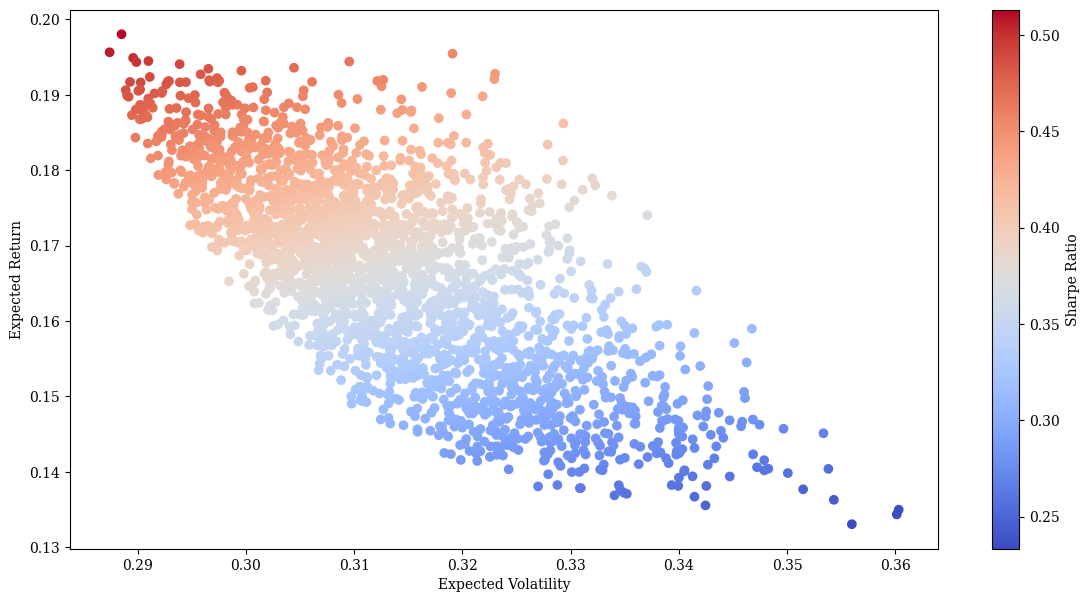

In [207]:
sharpe_ratio = (prets - 0.05)/pvols
plt.figure(figsize=(14, 7))
plt.scatter(pvols, prets, c=sharpe_ratio, marker='o', cmap='coolwarm')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')

# The Efficient Frontier

# The Capital Market Line